In [48]:
import arrow
import json
import pandas as pd
import numpy as np
import requests

%matplotlib inline 
import matplotlib.pyplot as plt

In [115]:
endpoint = 'http://localhost:8000'
country_codes = ['FR', 'DK']
start, end = [
    arrow.get(2016,  9, 1),
    arrow.get(2016, 11, 25)
]
time_span = map(lambda o: o[0], arrow.Arrow.span_range('hour', start, end))

In [80]:
r = requests.session()

In [81]:
def fetch_production(country_code, t):
    url = '%s/v1/production' % endpoint
    params = {
        'countryCode': country_code,
        'datetime': t.to('utc').isoformat()
    }
    obj = r.get(url, params=params).json()
    if not obj: return
    return obj if (t - arrow.get(obj['datetime'])).total_seconds() < 3600 else None
print time_span[0], fetch_production(country_codes[0], time_span[0])

2016-09-01T00:00:00+00:00 None


In [102]:
# Fetch all country production data
dates = map(lambda t: pd.Timestamp(t.datetime), time_span)
df_wind = pd.DataFrame(np.zeros((len(time_span), len(country_codes)))*np.nan, index=dates, columns=country_codes)

for country_code in country_codes:
    print 'Fetching %s..' % country_code
    for t in time_span:
        o = fetch_production(country_code, t)
        if not o: continue
        t = arrow.get(o['datetime']).datetime
        if o.get('production', {}).get('wind', None) is not None:
            df_wind.loc[t, country_code] = o['production']['wind']
# TODO: write in a cache

Fetching FR..
2016-11-23 19:00:00+00:00 FR
2016-11-23 20:00:00+00:00 FR
2016-11-23 21:00:00+00:00 FR
2016-11-23 22:00:00+00:00 FR
2016-11-23 23:00:00+00:00 FR
2016-11-23 23:15:00+00:00 FR
Fetching DK..
2016-11-23 17:00:00+00:00 DK
2016-11-23 18:00:00+00:00 DK
2016-11-23 19:00:00+00:00 DK
2016-11-23 20:00:00+00:00 DK
2016-11-23 21:00:00+00:00 DK
2016-11-23 22:00:00+00:00 DK


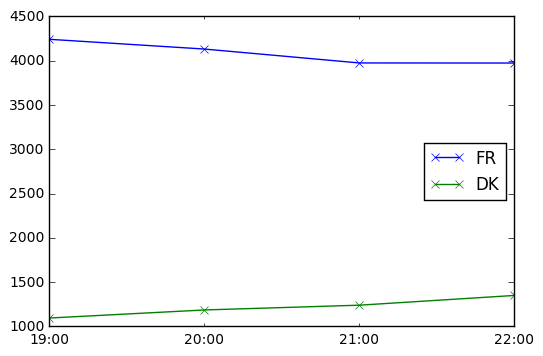

In [119]:
df_wind.dropna().plot(marker='x')

In [46]:
def fetch_best_forecast(t):
    # Return wind grid
    pass
def get_wind_measurements(country_code, wind_grid):
    # Return list of wind measurements inside the country
    pass